In [1]:
import sys
import warnings
import os
import math
import random
import datetime

import librosa
import librosa.display
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import pretty_midi
from IPython.display import Audio

warnings.filterwarnings("ignore")

In [56]:
input_audio = './files/wav/sea-fever-2.wav'
maximum_duration = 30

# Read audio file and convert to mono
assert os.path.exists(input_audio)
y, sr = librosa.load(input_audio, duration=maximum_duration)
print("Read audio file: {} @ {}hz".format(input_audio, sr))
Audio(data=y, rate=sr)

Read audio file: ./files/wav/sea-fever-2.wav @ 22050hz


In [67]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr,

                                         hop_length=512,

                                         aggregate=np.median)

peaks = librosa.util.peak_pick(onset_env, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.5, wait=30)

peaks

array([   3,   60,   97,  163,  199,  267,  302,  341,  372,  409,  448,
        482,  517,  550,  584,  646,  690,  731,  772,  820,  855,  896,
        930,  965, 1001, 1037, 1070, 1104, 1138, 1190, 1225, 1256, 1287])

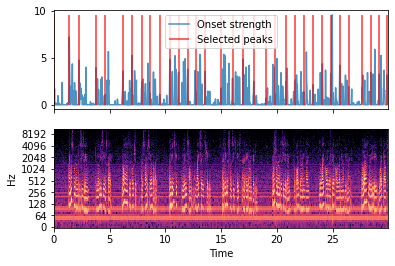

In [68]:
times = librosa.times_like(onset_env, sr=sr, hop_length=512)

fig, ax = plt.subplots(nrows=2, sharex=True)

D = np.abs(librosa.stft(y))

librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax[1])

ax[0].plot(times, onset_env, alpha=0.8, label='Onset strength')

ax[0].vlines(times[peaks], 0,

             onset_env.max(), color='r', alpha=0.8,

             label='Selected peaks')

ax[0].legend(frameon=True, framealpha=0.8)

ax[0].label_outer()